### Generator Boxa-Mullera

Służy do generowania par niezależnych liczb losowych o rozkładzie normalnym

1. Losujemy dwie liczby z zakresu (0, 1)
2. Liczymy:

![boxmuller](boxmuller.png)

3. Dostajemy 2 niezależne liczby losowe z rozkładu normalnego N(0, 1)

In [7]:
import math

import numpy as np
import matplotlib.pyplot as plt

In [8]:
def box_muller():
  u1 = np.random.uniform(0,1)
  u2 = np.random.uniform(0,1)

  y1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
  y2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)

  return y1, y2

In [9]:
simulations = 1_000_000
samples = []

In [10]:
for _ in range(simulations):
  y1, y2 = box_muller()
  samples.append(y1)
  samples.append(y2)

In [11]:
def normal_distribution(x):
  return (1 / np.sqrt(2*math.pi)) * np.exp(-x**2 / 2)

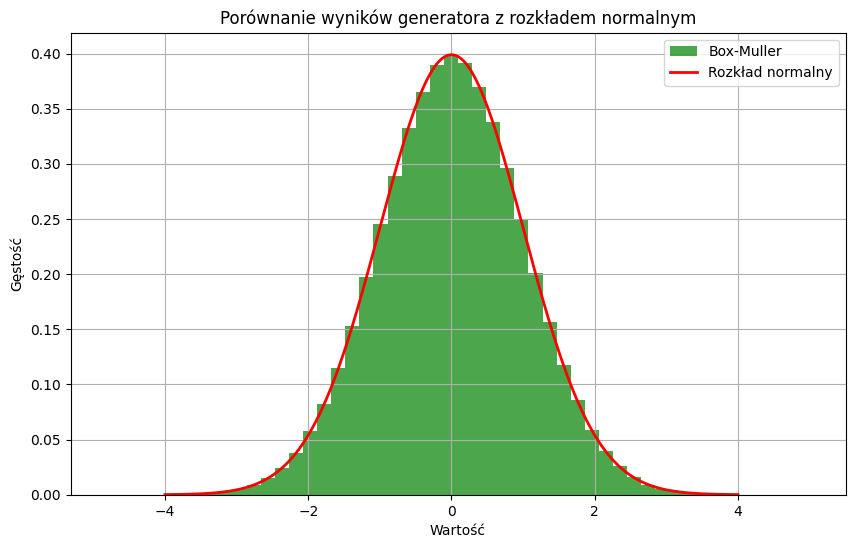

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(np.array(samples), bins=50, density=True, alpha=0.7, color='green', label="Box-Muller")

x_values = np.linspace(-4, 4, 1000)
y_values = [normal_distribution(x) for x in x_values]
plt.plot(x_values, y_values, color='red', lw=2, label='Rozkład normalny')

plt.title('Porównanie wyników generatora z rozkładem normalnym')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.grid(True)
plt.show()